 ## MSN 514 HW:7

 ### Erinç Ada Ceylan 22101844

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


 #### 1) Metropolis

In [ ]:
@numba.njit
def metropolis_sweeps(num_sweeps, spins, B, J, kbT):
    L = spins.shape[0]
    for _ in range(num_sweeps):
        for i in range(L**2):
            x = np.random.randint(0, L)
            y = np.random.randint(0, L)
            neighbor_sum = (spins[(x+1)%L, y] + spins[(x-1)%L, y] +
                            spins[x, (y+1)%L] + spins[x, (y-1)%L])
            dE = 2 * spins[x, y] * (J * neighbor_sum + B)
            if dE < 0 or np.random.rand() < np.exp(-dE / kbT):
                spins[x, y] *= -1
    return spins


 #### 2) Magnetization and Checkerboard Parameters

In [3]:
def calc_m(spins):
    return np.mean(spins)

def build_checkerboard(L):
    pattern = np.zeros((L, L), dtype=int)
    for x in range(L):
        for y in range(L):
            if (x + y) % 2 == 0:
                pattern[x, y] = 1
            else:
                pattern[x, y] = -1
    return pattern

def calc_n(spins, checker):
    return np.mean(spins * checker)


 #### 3) Thermalization and Measurement

In [4]:
def thermalize(spins, B, J, kbT, L, n_sweeps):
    spins_copy = spins.copy()
    spins_copy = metropolis_sweeps(n_sweeps, spins_copy, B, J, kbT)
    return spins_copy

def measure_vs_temperature(temp_array, spin_init, B, J, L, thermal_sweeps=100, measure_sweeps=20):
    cb_pattern = build_checkerboard(L)
    m_list = []
    n_list = []

    spins_current = spin_init.copy()

    for T in temp_array:
        spins_current = thermalize(spins_current, B, J, T, L, thermal_sweeps)
        m_accum = 0.0
        n_accum = 0.0
        for _ in range(measure_sweeps):
            spins_current = metropolis_sweeps(1, spins_current, B, J, T)
            m_accum += calc_m(spins_current)
            n_accum += calc_n(spins_current, cb_pattern)
        m_list.append(m_accum / measure_sweeps)
        n_list.append(n_accum / measure_sweeps)

    return np.array(m_list), np.array(n_list)


 #### 4) Main

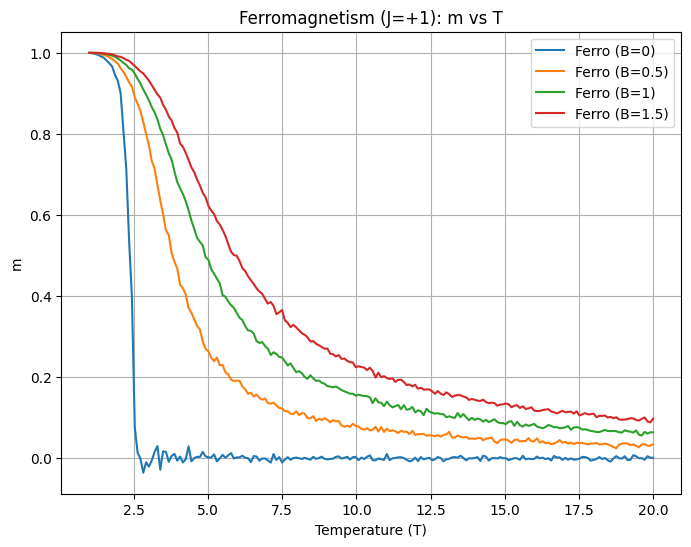

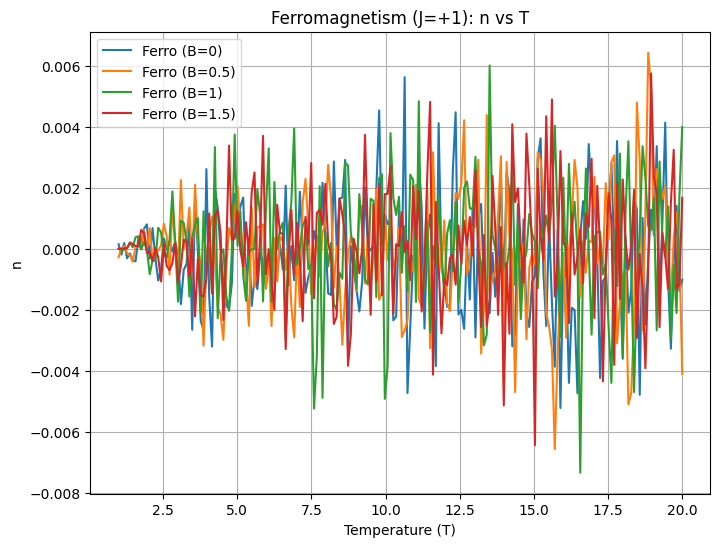

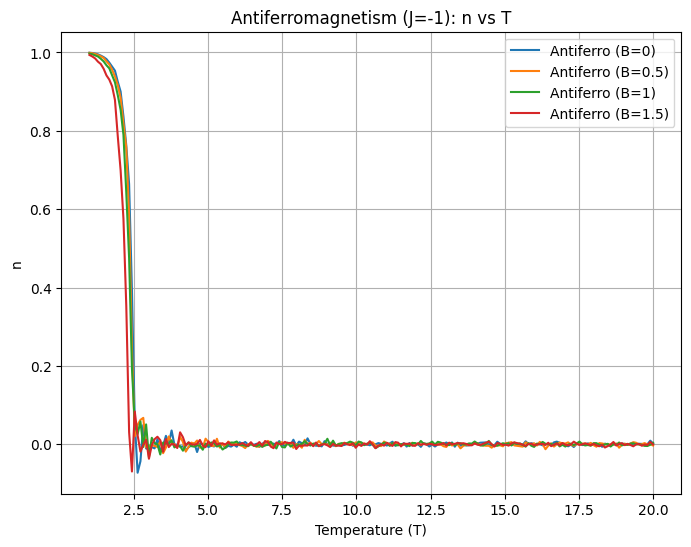

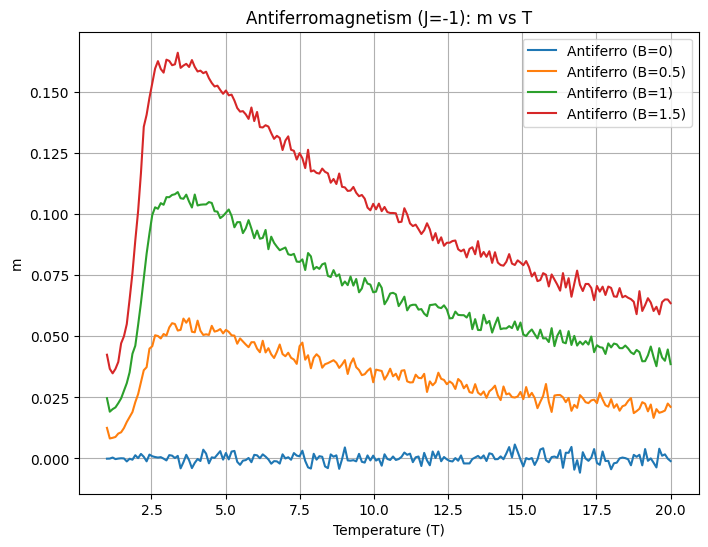

In [5]:
N = 100

temps = np.linspace(1, 20, 200)
B_values = [0, 0.5, 1, 1.5]

J = +1
plt.figure(figsize=(8,6))
for B in B_values:
    spins_init = np.ones((N, N))
    m_vals, n_vals = measure_vs_temperature(temps, spins_init, B, J, N,
                                            thermal_sweeps=75, measure_sweeps=20)
    plt.plot(temps, m_vals, label=f"Ferro (B={B})")

plt.title("Ferromagnetism (J=+1): m vs T")
plt.xlabel("Temperature (T)")
plt.ylabel("m")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
for B in B_values:
    spins_init = build_checkerboard(N)
    m_vals, n_vals = measure_vs_temperature(temps, spins_init, B, J, N,
                                            thermal_sweeps=75, measure_sweeps=20)
    plt.plot(temps, n_vals, label=f"Ferro (B={B})")

plt.title("Ferromagnetism (J=+1): n vs T")
plt.xlabel("Temperature (T)")
plt.ylabel("n")
plt.legend()
plt.grid(True)
plt.show()

J = -1
plt.figure(figsize=(8,6))
for B in B_values:
    spins_init = build_checkerboard(N)
    m_vals, n_vals = measure_vs_temperature(temps, spins_init, B, J, N,
                                            thermal_sweeps=75, measure_sweeps=20)
    plt.plot(temps, n_vals, label=f"Antiferro (B={B})")

plt.title("Antiferromagnetism (J=-1): n vs T")
plt.xlabel("Temperature (T)")
plt.ylabel("n")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
for B in B_values:
    spins_init = np.ones((N, N))
    m_vals, n_vals = measure_vs_temperature(temps, spins_init, B, J, N,
                                            thermal_sweeps=75, measure_sweeps=20)
    plt.plot(temps, m_vals, label=f"Antiferro (B={B})")

plt.title("Antiferromagnetism (J=-1): m vs T")
plt.xlabel("Temperature (T)")
plt.ylabel("m")
plt.legend()
plt.grid(True)
plt.show()
